# Introduction 

Welcome to the second module in the course Applied Plotting, Charting and Data Representation in Python. 

In the first module, we touched on the some of the fundamentals of putting together good information graphics, drawing on influential thinkers in the field, such 
- Alberto Cairo and 
- Edward Tufte. 

In this module, we're going to _pivot_ and focus on skills for building basic charts using the Python based Matplotlib tool kit. 

Matplotlib is a powerful open source tool kit for representing and visualizing data. Its creator, John Hunter, was heavily inspired by the MATLAB programming environment and borrows many of these elements. Matplotlib can be a bit confusing to learn from web resources. There's a traditional object-oriented API, but there's also a MATLAB-like scripting model. And I've found that it's not always clear why a given script from a blog post might work or not work. 

I'm going to try and demystify this a bit for you by providing a structured introduction to the toolkit. After the architecture introduction, we're going to dive right into creating charts and graphs. In this module, we're going to focus on some of the basics, scatter plots, line graphs, and bar charts.

We're also going to touch on how to label pieces of your charts to improve readability, and draw the user's attention to specific details. And how to manipulate data elements in a plotting environment. From here on out there will be fewer lectures and more emphasis on the module will be put on the plotting and charting assignments.

At the end of modules two, three and four, you should be able to produce publication quality charts and figures using a breadth of data. Let's dive in.

# matplotlib architecture 
We're going to use matplotlib within the Jupyter Notebook, just like with did with pandas.

Jupyter has some _specialized support_ for matplotlib and <font color=red>this is enabled by using the IPython magic __%matplotlib notebook__.</font>

Remember that in the Jupyter Notebook, the IPython magics are just __helper__ functions which set up the environment so that the _web based_ rendering can be enabled. 
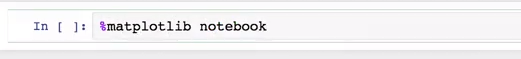



You can show matplotlib figures directly in the notebook by using the `%matplotlib notebook` and `%matplotlib inline` magic commands. 

`%matplotlib notebook` provides an interactive environment.

In [2]:
%matplotlib notebook

matplotlib itself can work well outside of the Jupyter environment. But for this course, we're going to focus on its use _within_ the web environment in part because of how popular Jupyter has become in data science practice. 

So what actually has happened when you run the __magic function__ matplotlib with the __inline__ parameter, is that matplotlib is configured to render into the browser. This configuration is called a __backend__, and matplotlib has a number of different backends available.

A backend is an __abstraction layer__ which knows how to interact with the operating environment, whether it's an operating system, or an environment like the browser, and knows how to render matplotlib commands. 

In fact, there's a number of different interactive backends, but there are also backends called hard copy backends, which support rendering to graphics formats, like scalable vector graphics, SVGs, or PNGs. So not all backends support all features, especially interactive features, which we'll touch on later in this course. 

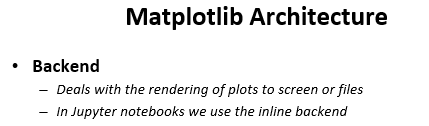

- Let's _import_ the matplotlib library, which we'll do as mpl, and 
- call get_backend() to make sure we're using the __nbAgg__ backend. 

In [3]:
import matplotlib as mpl
mpl.get_backend()

'nbAgg'

Great, you'll notice that matplotlib has a lot of non-Pythonic naming conventions. In particular, you'll be accessing variables using the __Get__ and __Set__, which is an accessor pattern which is more common in languages like Java. This is just something you have to get used to, but remember you can hit Tab for type hint autocompletion in the Jupyter Notebook. So this can help you find the functions that you're looking for.

Now we're not going to spend much time with the __backend layer__, but it's important to be aware of. 

> If you're on Mac OS, for instance, your default backend when using matplotlib is one system. While on Linux, GTK is my default backend. 

The next layer is where we'll spend most of our time though, and that's called the __artist layer__. The artist layer is an _abstraction_ around drawing and layout primitives.
- The root of visuals is a set of __containers__ which includes a figure object with one or more subplots, each with a series of one or more axes.
    - This last object, the axes is the most common one you'll interact with, changing the range of a given axis or plotting shapes to it. 

> And just a brief aside, especially since this is a global classroom with people from around the world enrolled where English might not be their first language, matplotlib relies heavily on the _axes_ object, which is the plural form of axis.

> But matplotlib _also_ has an _axis_ object as well. And an axes is actually made up of two _axis_ objects. One for the x, horizontal dimension. And one for the y, or vertical dimension. So you might hear me pronouncing these two words, axes and axis a bit more intentionally than I would in regular speech in order to help make things easier to follow.

- The artist layer also contains
    - __primitives__ and
    - __collections__. 
    - These are base drawing items, things like a rectangle, ellipse or a line.
- And collections of items, such as a path, which might capture many lines together into a polygon shape. 

> Collections are easy to recognize as their name tends to end in the word collection. 

It's worth taking a moment to look at the kinds of artists which are available. Here's an image from the matplotlib documentation on artists. 
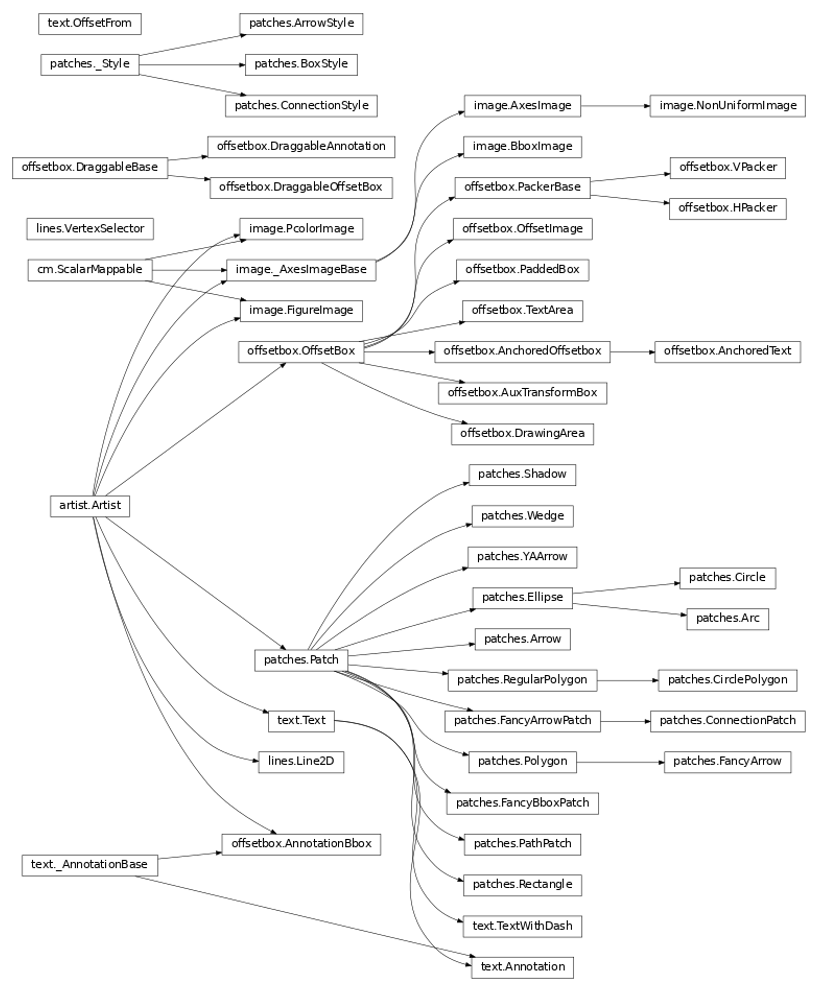

You'll see that there's lots of child objects of the artists object, and that one of them is called patches.patch. This name comes from the matlab roots of the project. And a patch is any two-dimensional object which has a face color and an edge color. And children of the patch class are the primitives, as we've discussed.


Okay, so matplotlib has two layers.
- A __backend layer__, 
    - which knows about low level graphics routines it can render to the screen or to a file. 
    - We'll use the inline backend for most of our work.
- And the __artist layer__, which describes 
    - __primitives__,
    - __collections__, and
    - __containers__. 
    - It knows how figures are composed of subfigures and where objects are in a given axes coordinate system.
    
So with this, we can actually get started building figures and rendering them. 

But there's _one_ more layer which is extremely important for us as data scientists in particular, and this is called the __scripting layer__. 

You see, if we were writing an application to use matplotlib, we might never care about the scripting layer. But this layer helps simplify and speed up our interaction with the environment in order to build plots quickly. It does this, frankly, by doing a bunch of magic for us. 

And the difference between someone who is effective with matplotlib and someone who isn't, is usually <font color='red'> based on their understanding </font> of this _magic_ of the __scripting layer__. 

The scripting layer we use in this course is called __pyplot__. 

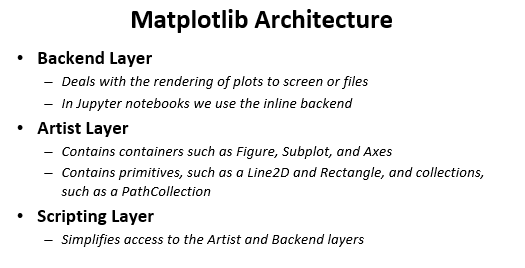

So that describes the matplotlib layer cake. 
- There's a __backend__, which deals with actual drawing.
- A bunch of __artists__ on top of the backend, which describe how data is arranged. 
- And a __scripting layer__, which actually creates those artists and choreographs them all together. 

I just want to address one more topic before we move on, and that's the difference between
- __procedural__ and 
- __declarative__ visualization libraries and, well,
- user interfaces more generally. 

The pyplot scripting layer is 
- a procedural method for building a visualization, in that we tell the underlying software which drawing actions we want it to take in order to render our data. 
- There are also declarative methods for visualizing data. HTML is a great example of this. Instead of issuing command after command to the backend rendering agent, which is the browser with HTML, HTML documents are formatted as models of relationships in a document, often called the DOM, or Document Object Model. 

These are two fundamentally _different_ ways of creating and representing graphical interfaces. 
- The popular JavaScript library, for instance, D3.JS is an example of a __declarative__ information visualization method. 
- While matplotlib's pyplot is an example of a __procedural__ information visualization method.

In the next lecture, we're going to get dirty and start making some graphs. But before we do that, I wanted you to check out an article by John Hunter and Michael Droettboom. While now a bit dated, this article was published in the second volume of the book Architecture of Open Source Applications, and provides a little more context for the architecture of matplotlib.

# Basic Plotting with matplotlib

With the Matplotlib magic having set the back end for us, we're going to start our plotting journey by making a graph using the plot function. A plot has two axis. An x-axis, along the horizon, and a y-axis, which runs vertically.

First, let's import the pyplot scripting layer as plt. All of the functions which we'll run against the pyplot module are part of the scripting layer of the architecture.

Let's take a look at the plot function by looking at the docstring. 

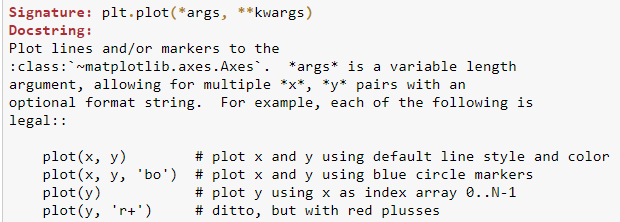

If you're not used to seeing it, this kind of python function declaration with two arguments, the __star args__ and the __double star kwargs__, can be a bit obscure. 

- What's being said here by the star args is that the function supports _any_ number of __unnamed__ arguments. 
- The double star keyword args also means that it supports _any_ number of __named__ arguments. 

This makes the function declaration very _flexible_ since you can pass in basically any number of arguments, named or not. But it makes it difficult to know what is an appropriate argument.

In [4]:
import matplotlib.pyplot as plt
plt.plot?

Reading on, we see that the arguments will be interpreted as X, Y pairs. So let's try with just one data point at position (3, 2). 
 
Here we see that the return value is aligned to the object. And we see our first figure appear. We _don't_ see any data points though, which is a bit odd. 

It turns out that the _third_ argument should be a string, which signifies how we want that data point to be rendered. 

<IPython.core.display.Javascript object>


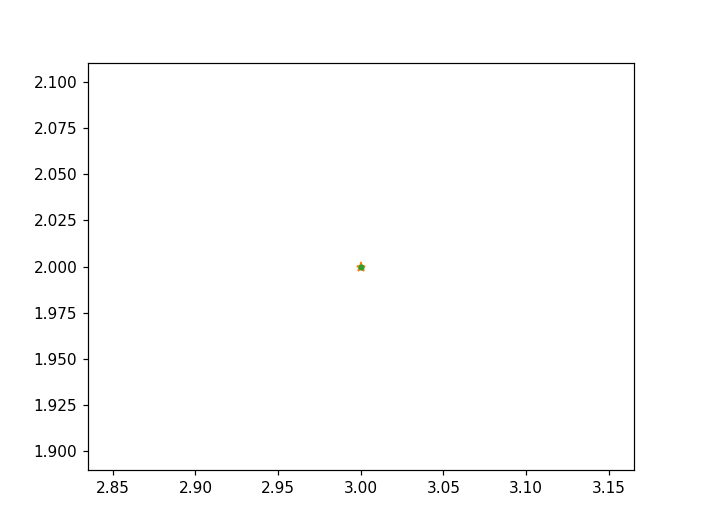

In [5]:
# because the default is the line style '-', 
# nothing will be shown if we only pass in one point (3,2)
plt.plot(3, 2)

Let's use a period for a dot and we'll see that our data point shows up. There we go. 

In [6]:
plt.plot(3, 2, '*')

You'll notice that the subsequent costs of plot have actually _updated_ our visualization. This is a particular feature of this __interactive__ back end. Other back ends might not. 

> For instance, you might see some web tutorials using the _older_ %matplotlib __inline magic__ instead of the %matplotlib __notebook magic__. The inline magic is _not_ interactive. 

Subsequent cause create new plots as new cells in the notebook. This can be handy too. I think here's where some of the confusion with matplotlib as a library tends to come from. 

In the last lecture, I explained that there's an artist layer, and that it is figures, with subplots and axes and data points which are rendered as patches onto these axes. But we haven't seen any of that here. Instead we've just called one function on a module named plot. So what's going on?

You see, the pyplot _scripting_ interface is managing a lot of objects for you. 
- It keeps track of the latest figure, of sub plots and of the axis objects.
- Moreover, it actually hides some of these behind methods of its own.
- So, the pyplot module itself has a function which is called plot. But it _redirects_ calls to this function to the current axis object. 

This makes for a _significant_ learning curve and you'll see many discussions in web tutorials stack overflow where people are confused by these two _different_ approaches to making figures show up. So let's take a look at a comparable approach that's a bit more verbose. And some people would call this the matplotlib object API. But I think it's more accurate to think of it as _directly_ interfacing with the artist layer instead.

In [7]:
# we can pass in '.' to plt.plot to indicate that we want
# the point (3,2) to be indicated with a marker '.'
plt.plot(3, 2, '.')

Let's see how to make a plot without using the scripting layer.

1. First I'm going to import a new backend called FigureCanvasAgg. 
    - I don't have to use the modular level __use function__ since we're not calling this from the scripting API.
2. I'll also import the Figure object.
3. Then we'll go ahead and create a new figure and associate it with the backend.
4. We can then add a subplot directly to this. 
    - We're going to talk more about subplots in a future lecture but this number, 111, actually means that we just want one plot. 
    - The return value for the subplot is the axes object, which contains methods for plotting. 
5. So, we can plot our image as per usual. Now, the backend that we're using, the one for the jupiter notebooks, isn't able to render this directly, since it expects the scripting layer pie plot to have created all of the objects.
6. So here, we'll save the figure to a png file instead. 
7. Then we'll do a quick html cell magic and execute that, and see the rendered image. 



In [8]:
# First let's set the backend without using mpl.use() from the scripting layer
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

# create a new figure
fig = Figure()

# associate fig with the backend
canvas = FigureCanvasAgg(fig)

# add a subplot to the fig
ax = fig.add_subplot(111)

# plot the point (3,2)
ax.plot(3, 2, '.')

# save the figure to test.png
# you can see this figure in your Jupyter workspace afterwards by going to
# https://hub.coursera-notebooks.org/
canvas.print_png('test.png')

We can use html cell magic to display the image.

In [9]:
%%html
<img src='test.png' />

That's a lot more work than using the scripting layer. The scripting layer, though, isn't magic, it's just doing some of the _behind the scenes_ work for us. 

For instance, when we make a call to pyplot's plot.plot, the scripting layer _actually_ looks to see if there's a figure that currently exists and if not, it creates a _new_ one. It then _returns_ the axis for this figure. 

We can actually get access to the figure using the _GCF function_, which stands for get current figure, of PyPlot, and get access to the axes as well using the GCA function, get current axes. 

1. Okay, let's create a _new_ figure with PyPlot. This means it won't update our figure at the top of this file.
2. Then let's make a plot,
3. grab the axes, and 
4. set the x and y limits.
    - We can do this using the _axis function_. This function takes four parameters:
        1. a minimum value for x, which we'll put at zero, 
        2. a maximum value for x, which we'll put it at six.
        3. Then corresponding minimum and
        4. maximum values for Y which we'll put it zero and 10. 
5. Since we're doing this with the scripting layer, once we run the jupiter cell it renders to the nbAgg back end as we might expect.

<IPython.core.display.Javascript object>


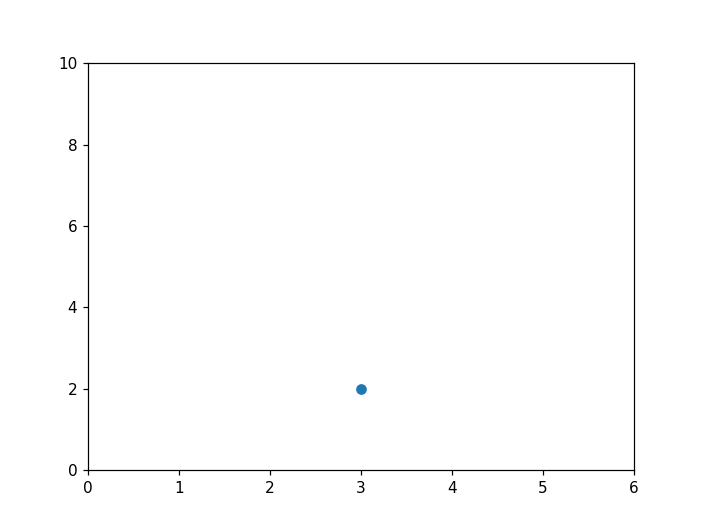

[0, 6, 0, 10]

In [10]:
# create a new figure
plt.figure()

# plot the point (3,2) using the circle marker
plt.plot(3, 2, 'o')

# get the current axes
ax = plt.gca()

# Set axis properties [xmin, xmax, ymin, ymax]
ax.axis([0,6,0,10])

All right, one more demonstration on the fundamentals of putting together a plot. You can add artists to an axes object at any time. PyPlot is doing that for us when we call the plot function. 

It's determining 
- what shape we want from the string,
- the location associate with that shape, then 
- it's creating a patch object and adding that to the axes.

If we make subsequent calls to the plot function this will _add more data_ to our chart. You can see that when this is done, the points are rendered in different colors, as the axis _recognizes_ them as different data series. 

<IPython.core.display.Javascript object>


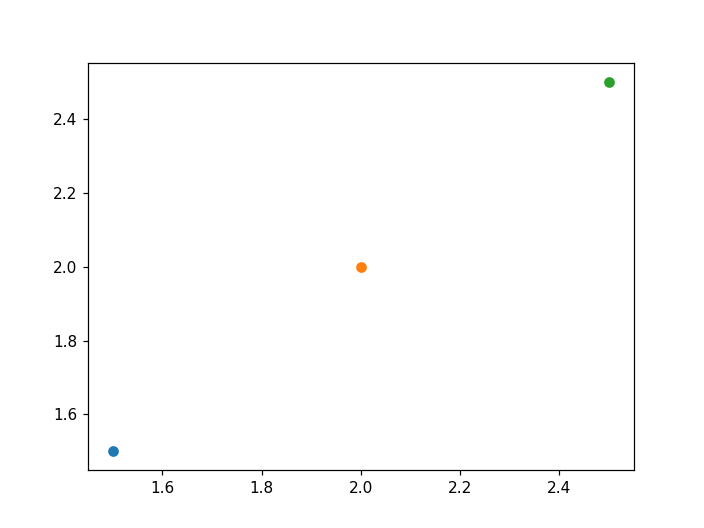

In [11]:
# create a new figure
plt.figure()

# plot the point (1.5, 1.5) using the circle marker
plt.plot(1.5, 1.5, 'o')
# plot the point (2, 2) using the circle marker
plt.plot(2, 2, 'o')
# plot the point (2.5, 2.5) using the circle marker
plt.plot(2.5, 2.5, 'o')

We can go further with the axis object to the point where we can actually get all of the child objects that that axis contains. We do this with the axis get_children() function. 

Here we can see that there's actually 
- three Line2D objects contained in this axis. These are our __data points__.
- A number of __spines__, which are actual renderings of the borders of the frame, including tic markers, 
- two axis objects,
- and a bunch of text, which are the labels for the chart.
- There's even a rectangle, which is the background for the axis.

Okay. There is a whirlwind tour of how to be productive with matplotlib and make your first chart.

In the next lecture, we're going to go through some of the different built in charting options which are available to us.

In [12]:
# get current axes
ax = plt.gca()
# get all the child objects the axes contains
ax.get_children()

 Text(0.5,1,''),
 Text(0,1,''),
 Text(1,1,''),

# Scatterplots

In the previous lecture, I introduced the plot function, which generates a series of lines which get rendered against an axis object. 

Matplotlib actually has a number of useful plotting methods in the scripting layer which correspond to different kinds of plots. We are not going to go through all of them here but we'll touch on a few of the major ones.

Regardless, there are a few things to keep in mind which we learned in the previous lecture.

1. One, pyplot is going to retrieve the current figure with the function __gcf__ and then get the current axis with the function __gca__.
    - Pyplot is keeping track of the axis objects for you. But don't forget that they're there and we can get them when we want to get them.
2. Two, also pyplot just mirrors the API of the axis objects.
    - So you can call the plot function against the pyplot module. But this is calling the axis plot functions _underneath_, so be aware. 
3. And three, finally, remember that the function declaration from most of the functions in matplotlib end with an _open_ set of keyword arguments. 
    - There are a lot of different properties you can control through these keyword arguments. And I'll start peppering in some of them this week to demostrate that the matplotlib documentation is really key in gaining a full understanding of the options available. 

With that in mind let's move on to talk first about scatterplots. A scatterplot is a two dimensional plot similar to the line plots I've shown. The scatter function takes 
- an x-axis value as a first argument and 
- y-axis value as the second. 

If the two arguments are the same, we get a nice diagonal alignment of points.

Let's do this now. 

1. I'll bring in numpy as we're going to use it later and matplotlib is really based on numpy arrays. 
2. I'll create a short array for x and make y the same. 
3. Then create a new figure and scatterplot. 


<IPython.core.display.Javascript object>


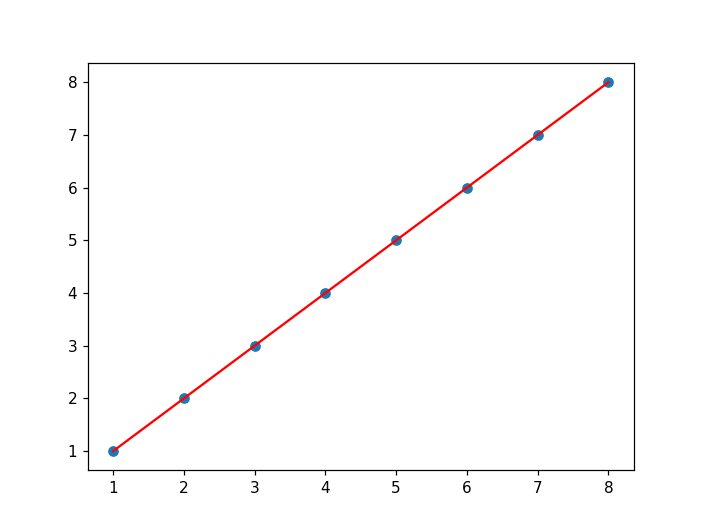

In [13]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8])
y = x

plt.figure()
plt.scatter(x, y) # similar to plt.plot(x, y, '.'), but the underlying child objects in the axes are not Line2D
plt.plot(x,y,'r') #draws a line through points


You can see in this plot a nice diagonal line and matplotlib has sized our axises accordingly. 

Now, scatter doesn't represent items as a series. Instead, we can pass it a list of colors which correspond to given points. 

1. Let's use some list arithmetic to create a new list just short of the number of data points we need and set all of the values to green. 
2. Then we'll add a final value of red. 
3. Then we'll plot this, and we'll set the size of the data points to 100 to make it a little easier to see. 

<IPython.core.display.Javascript object>


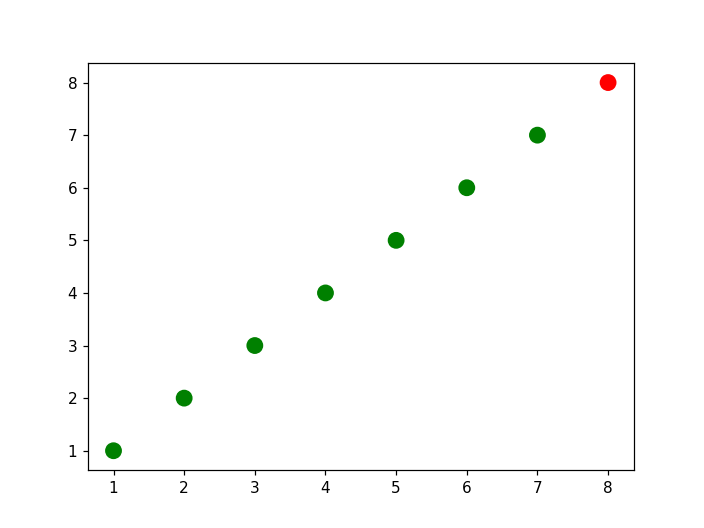

In [14]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8])
y = x

# create a list of colors for each point to have
# ['green', 'green', 'green', 'green', 'green', 'green', 'green', 'red']
colors = ['green']*(len(x)-1)
colors.append('red')

plt.figure()

# plot the point with size 100 and chosen colors
plt.scatter(x, y, s=100, c=colors)

The separation of data points into lists, which describes them as components, is a pretty common pattern in matplotlib. You have some set of items, but they're actually described as the same slice across many different data sources. 

In more object-based language, but you might expect that each data point is represented with its own instance, which encapsulates all of its properties. For instance, it's called an x value and a y value and a color and a size. 

That's not the case here. This is where it's useful to have some knowledge of 
- _list comprehensions_ and 
- _lambdas_ as we talked about in the first course. 

Also important is the 
- zip function and
- list unpacking.

And because this is so common in the Python data science world, I'm going to take a brief aside and talk about that here. 

Recall that the zip method
- takes a number of iterables and
- creates tuples out of them, matching elements based on index.

> So if we have two lists of numbers, zip will take the first from each and create a tuple, then the second from each and create a tuple, and so on.

Also remember that zip has _lazy_ evaluation because it's actually a _generator_ in Python 3 which means we _need_ to use the list function if we want to see the results of iterating over zip. 

Let's demonstrate. Here we'll create a new zip generator with a zip function passing in two lists of numbers. When we convert this generator to a list, we see there's a list of pairwise tuples. 

In [15]:
# convert the two lists into a list of pairwise tuples
zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])

print(list(zip_generator))
# the above prints:
# [(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]

zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
# The single star * unpacks a collection into positional arguments
print(*zip_generator)
# the above prints:
# (1, 6) (2, 7) (3, 8) (4, 9) (5, 10)

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]
(1, 6) (2, 7) (3, 8) (4, 9) (5, 10)


In [16]:
#JK code
z = zip([1,2,3],[4,5,6])
print(z)
print(list(z)) #Note: once that once it's called using list, z is now generated.
z = zip([1,2,3],[4,5,6]) #need to declare again to unpack it
print(*z)

[(1, 4), (2, 5), (3, 6)]
(1, 4) (2, 5) (3, 6)


In [17]:
#JK code
x = (1, 4), (2, 5), (3,6)
print('Convert 3 tuples of 2 elements to 2 tuples of 3 elements')
print(type(x))
print(x)

#Problem: for some reason, z=zip(x) doesn't work...it doesn't zip correctly. 
#Solution: this is because we need the unpack operator *
z = zip( *x) #Input: 3 tuples of 2 elemments. Unpack * calls zip( (1,4), (2,5), (3,6)) like how is done above
print(z)

print(list(z)) #Output: 2 tuples of 3 elements
print('')
print('Convert 3 tuples of 2 elements to 2 tuples of 3 elements then back to original 3 tuples of 2 elements')
print(x)
z = zip( *x) #Input: 3 tuples of 2 elements. 
print(z) #lazy generator 
z = tuple(z) #convert from zip generator to tuples
print(type(z)) #Tuples
print(z) #Output: generate 2 tuples of 3 elements
z = zip(*z) #create lazy generator of 3 tuples of 2 elements (original dataset)
print(list(z)) #Output: 3 tuples of 2 elements (original dataset)
print(list(z)) #note that this is now empty
print(len(list(z))) #no elements
x=None

print('')
x = (1,2), (3,4), (5,6)
x,y = zip(*x) #when call zip into 2 variables (x,y here), does not return a zip file but actually the separated "list"ed variables
print(type(x))
print(x)
print(y)

Convert 3 tuples of 2 elements to 2 tuples of 3 elements
<class 'tuple'>
((1, 4), (2, 5), (3, 6))
[(1, 2, 3), (4, 5, 6)]

Convert 3 tuples of 2 elements to 2 tuples of 3 elements then back to original 3 tuples of 2 elements
((1, 4), (2, 5), (3, 6))
<class 'tuple'>
((1, 2, 3), (4, 5, 6))
[(1, 4), (2, 5), (3, 6)]
[]
0

<class 'tuple'>
(1, 3, 5)
(2, 4, 6)


In [18]:
# use zip to convert 5 tuples with 2 elements each to 2 tuples with 5 elements each
print(list(zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))))
# the above prints:
# [(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]


[(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]


Storing point data as tuples is common and you should be familiar with being able to convert data to and from this form.

If we want to turn the data back into two lists, one with the x component and one with the y component, we can use __parameter unpacking__ with zip.

When you pass a list or an interval more generally to a function and _prepend_ it with an __asterisk__, each item is taken out of the iterable and passed as a _separate_ argument. 

So we can do that here, passing into a new zip function five parameters, each of length two. Zip will then create a new two value list which is identical to our original x and y values. 

If we want to get even fancier, we can unpack this result into two variables directly, x and y. 

In [19]:
zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
# let's turn the data back into 2 lists
x, y = zip(*zip_generator) # This is like calling zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))
print(x)
print(y)
# the above prints:
# (1, 2, 3, 4, 5)
# (6, 7, 8, 9, 10)

(1, 2, 3, 4, 5)
(6, 7, 8, 9, 10)


So that's a brief aside on a variable tool when it comes to manipulating and cleaning data in the wild. Now, let's get back to plotting.

Let's take these two lists and plot them to a new figure using scatter. 

1. Instead of plotting them as one data series, we'll slice the lists and plot them as two data series.
2. You'll note that we can color each series with a single value if we want to. 
3. We can also do things like change the color or transparency of an entire series, or individual data points as well. 
4. Finally, we have the ability to label the data series, and I'll do that now. This will come in handy later when building a legend. 

<IPython.core.display.Javascript object>


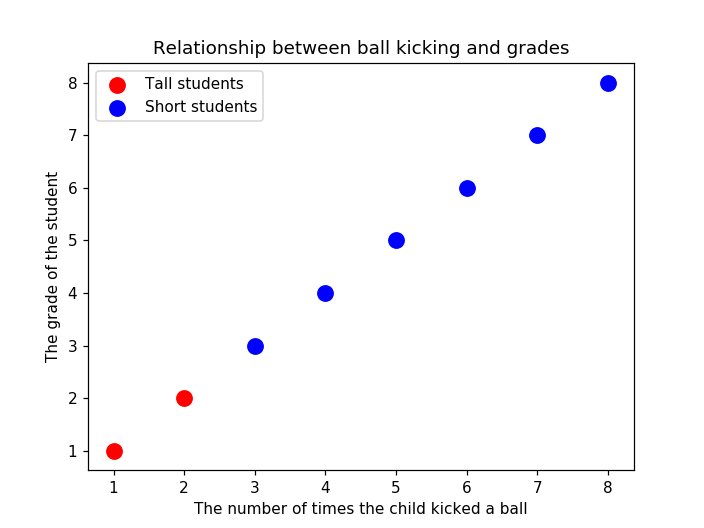

In [20]:
x = np.array([1,2,3,4,5,6,7,8])
y = x

plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students')

Now before we leave the scatter plot, let's talk a bit more about the properties of axis. The axis generally have labels to them to explain what they represent or the units that they describe. Charts tend to have titles as well, so let's put this in place now. Since pyplot mirrors much of the axis API, we can make calls directly on pyplot.

Let's do this now, adding in
1. an xlabel,
2. a ylabel, and 
3. then a title.
4. And let's add a legend as well. You'll see that matplotlib places this in the upper left hand corner and puts a little visual about our data series there.
    - In the docs for the legend, you'll see that there are a number of different parameters and one of them is called loc. And a value of 4, we'll put it in the lower right hand corner of the axis.
    - We could also get rid of the frame and add a title, and do any number of different transformations.

In [21]:
# add a label to the x axis
plt.xlabel('The number of times the child kicked a ball')
# add a label to the y axis
plt.ylabel('The grade of the student')
# add a title
plt.title('Relationship between ball kicking and grades')

Text(0.5,1,'Relationship between ball kicking and grades')

In [22]:
# add a legend (uses the labels from plt.scatter)
plt.legend()

In [23]:
# add the legend to loc=4 (the lower right hand corner), also gets rid of the frame and adds a title
plt.legend(loc=4, frameon=False, title='Legend')

In [24]:
# get children from current axes (the legend is the second to last item in this list)
plt.gca().get_children()

 Text(0.5,1,'Relationship between ball kicking and grades'),
 Text(0,1,''),
 Text(1,1,''),

In [25]:
# get the legend from the current axes
legend = plt.gca().get_children()[-2]

In [26]:
legend.get_children()[0]

In [27]:
legend.get_children()[0].get_children()[1]

In [28]:
legend.get_children()[0].get_children()[1].get_children()[0]

In [29]:
# you can use get_children to navigate through the child artists
legend.get_children()[0].get_children()[1].get_children()[0].get_children()

The legend itself is an artist, which means it can contain children. Let's take advantage of this and write a little routine to recursively go through the list of children in an artist. 
1. First, we'll import the artist class from matplotlib. 
2. Then we'll make a recursive function which takes in an artist and some depth parameter.
3. Then checks if the object is an artist and if so, prints out its string name. 
4. Then recurses and increases the depth for pretty printing. 
5. Finally, we can call this on the legend object itself. 

So you can see the legend artist is just made up of a number of different offsetboxes for drawing, as well as TextAreas and PathCollections.

In [30]:
# import the artist class from matplotlib
from matplotlib.artist import Artist

def rec_gc(art, depth=0):
    if isinstance(art, Artist):
        # increase the depth for pretty printing
        print("  " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)

# Call this function on the legend artist to see what the legend is made up of
rec_gc(plt.legend())

Legend
            Text(0,0,'None')
                        Text(0,0,'Tall students')
                        Text(0,0,'Short students')
    FancyBboxPatch(0,0;1x1)


What I want you to take away from this is that there is _nothing magical_ about what matplotlib is doing.

Calls to the scripting interface, just create figures, subplots, and axis. Then load those axis up with various artists, which the back-end renders to the screen or some other medium like a file. 

<font color=red>While you'll spend 95% of your time at the scripting layer, happily creating graphs and charts, it's important to understand how the library works underneath for the other 5% of the time. </font>

And the time that you will use this is when you really want to have control over and to create your own charting functions, and you'll have a chance to do that by the end of this course. 

In the next lecture, we'll go back into line plots and create a few more then onto bar charts.

# Line Plots

We've already seen line plots a couple times, but they looked a lot like scatter plots.

- A line plot is created with the plot function.
- And plots a number of different series of data points.
- Connecting each series in a point with a line. 

Let's jump right in. 

We can use numpy to use a linear series of data points one through eight. We'll also create a number of quadratically increasing values as the second series. Remember that you can use broadcasting in numpy to do this efficiently. Here we can plot this, and this time I'll use the mini formatting language, to ask mapplotlib to draw lines between data points. 

We'll see the result as a two data series, the linear one at the bottom and the quadratic one at the top. Both are using dots because we use the -o flag.

<IPython.core.display.Javascript object>


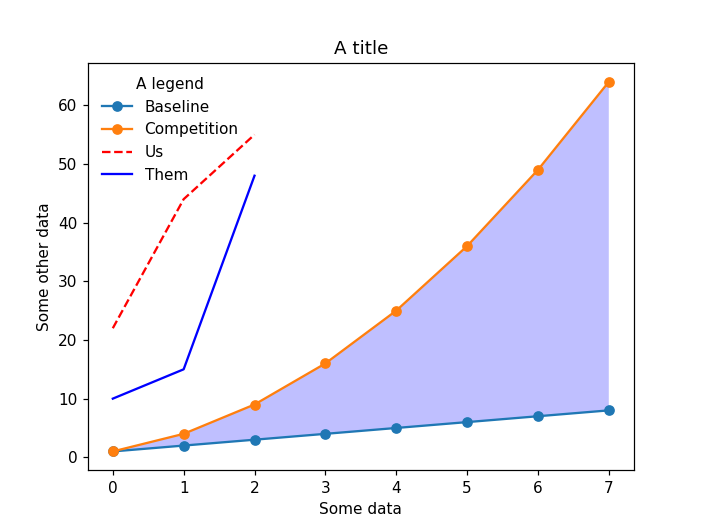

In [31]:
import numpy as np

linear_data = np.array([1,2,3,4,5,6,7,8])
exponential_data = linear_data**2

plt.figure()
# plot the linear data and the exponential data
plt.plot(linear_data, '-o', exponential_data, '-o')

So there are a couple of things which are new about this versus the scatter plots. 

- First, we only gave y-axes values to our plot call, no x axes values. Instead, the plot function was smart enough to figure out that what we wanted was to use the index of the series as the x value. Which is pretty handy when you want to make quick plots. 
- Second we see that the plot identifies this as two series of data and that the colors of the data from the series are different including the data points and the lines between the data points. This is different from the scatter plot which required us to label the lines directly.

Like all good Python libraries matplotlib invents a string based mini language for commonly used formatting. 

For instance, we could use an s inside of the formatting string which would plot another point using a square marker. Or we could use a series of dashes and dots to identify that a line should be dashed instead of solid. 

Here, let's plot another series.

In [32]:
# plot another series with a dashed red line
plt.plot([22,44,55], '--r')

In [33]:
#JK code
plt.plot([10, 15, 48], '-b')

We can use the regular axes functions creating labels for the axes and for the figure as a whole. 

And we can create a legend too. But note that since we didn't label the data points as we did with the scatter plot, we need to create legend entries when we add the legend itself. 

In [34]:
plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
# add a legend with legend entries (because we didn't have labels when we plotted the data series)
plt.legend(['Baseline', 'Competition', 'Us', 'Them'], loc=2, frameon=False, title='A legend')

This is a good time to introduce the fill between function of matplotlib. Now this function isn't specific to line plots, but you can see it commonly used with these plots, so I'll introduce it in this context. 

Let's imagine that we want to _highlight the difference_ between the green and the blue curves. We could tell the access to paint a color between these series using the fill between function. 

- First we get the current axes object, then 
- we indicate the range of x values we want to be filled. We didn't specify any x values in our call to plot, so we'll just use the same range of data points it's already using. 
- Then we'll put in our lower bounds and our upper bounds along with the color we want painted and 
- for fun I'll include a transparency value.

And that's all there is to it. This is a _great_ way to show, for instance,
- the standard deviation of results or
- error bars. 

More likely you'll have a series of x values and y values which you're looking to plot.

In [35]:
# fill the area between the linear data and exponential data
plt.gca().fill_between(range(len(linear_data)), 
                       linear_data, exponential_data, 
                       facecolor='blue', 
                       alpha=0.25)

Let's try working with dates!

Often with line plots this comes in the form of __date time__ on the x axes. 

Let's change our x axis to a series of eight date time instances in one day intervals. 
- Let's first create a new image.
- Then the NumPy arrange function which you saw previously is really helpful at sampling some dates for us. 
- We can ask for an arrangement of dates at daily intervals just by providing the start and end dates. 
- We can now replot our linear and exponential data against this set of dates.

<IPython.core.display.Javascript object>


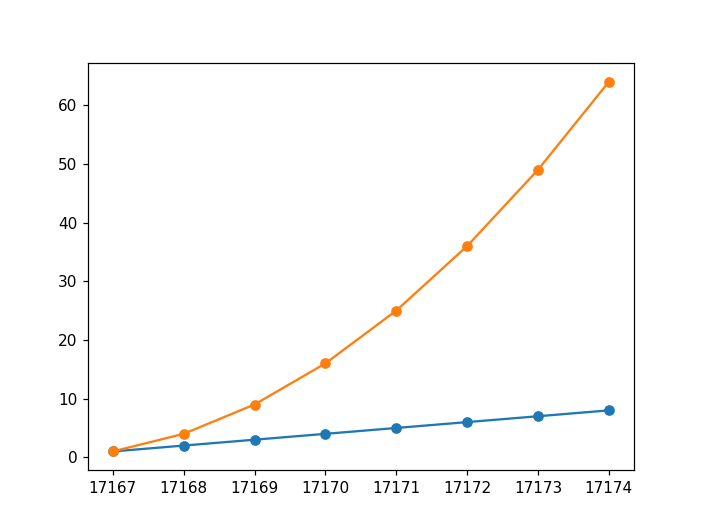

In [36]:
plt.figure()

observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')

plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

That __didn't__ seem to get us the effect that we were interested in. 

> Datetime technically works but does not convert well in x-axis

This is unfortunately one of the great _pain points_ in data science in Python: date time handling. 
- The standard library does it in two different ways, while 
- NumPy, which is used for scientific computing, does it a third way. 
- In fact, there's probably a dozen replacement libraries for date times in Python. 

The solution I'm going to use here comes from a helper library in Pandas called __to_datetime__. This specifically _converts_ NumPy dates into standard library dates which is what matplotlib is expecting.

- Let's first import Pandas
- then create a new figure.
- And let's arrange our set of dates as per the previous code block. 
- Now I could iterate through the list, converting them. But instead I'll use the map function of the standard library. Which will apply the Pandas to datetime against each of the elements in observation_dates, and return the result.
- Now let's plot that result.

Let's try using pandas

In [38]:
import pandas as pd

plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = map(pd.to_datetime, observation_dates) # trying to plot a map will result in an error
plt.plot(observation_dates, linear_data, '-o',  
         observation_dates, exponential_data, '-o')

<IPython.core.display.Javascript object>

RuntimeError: matplotlib does not support generators as input

That resulted in error. It's a pretty confusing one at that. 

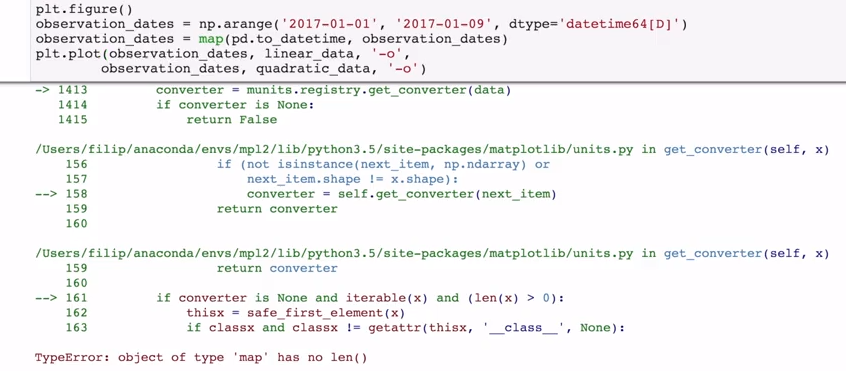

You see, the problem is the map function returns an iterator. Matplotlib can't handle the iterator, so we need to convert it to a list first. This is really easy to do, but I wanted to demonstrate
- some of the _real-world problems_ you can run into when you're looking to build plots in Python.
- And why it's important to understand, not only the toolkit, but how the language works. 

Here's a quick fix. 

- We can convert the map result to a list, but keep in mind this isn't a very memory-efficient way of handling the data. 
- This produces a pretty decent looking figure with the data we want. 
- But the dates _overlap_ pretty heavily. 

<IPython.core.display.Javascript object>


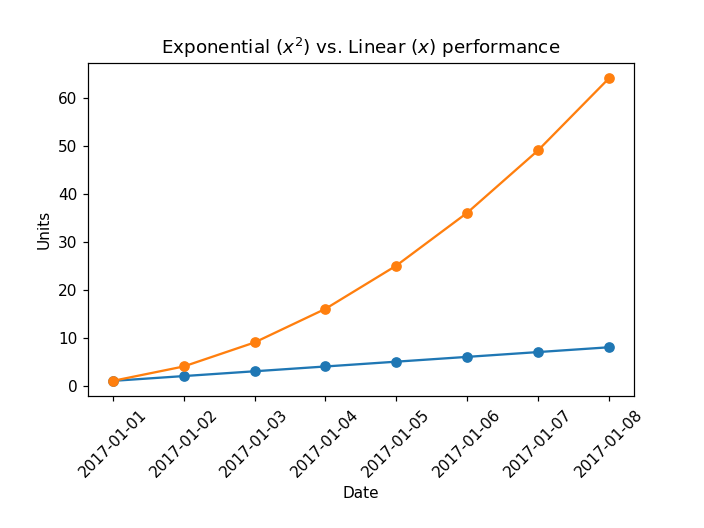

In [39]:
plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = list(map(pd.to_datetime, observation_dates)) # convert the map to a list to get rid of the error
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

Now, there's a couple of things that we could do here. For instance, everything is from 2017. So we could iterate through and change the labels by stripping the year. And add an x axis label which clarifies that it's all for the year of 2017. This is pretty reasonable, but I wanted to show you a couple of features of how matplotlib uses text. 

- First we can get a single axis using the x-axis or y-axis properties of the axes object which we can get, remember, with GCA or Get Current Axis.
    - There are lots of interesting properties of the axes object and you use some them in the assignment. For instance; you can get the grid lines, the tick locations for both major and minor ticks and so on. 
    - Just like all artists, an axes has a bunch of children which are themselves artists. In fact, if you're are following along in the Jupiter notebook with this lecture why don't you just pause the video. And run the wreck_gc function we wrote earlier to explore what kind of artists the x axes object actually contains.

What I want to show you though, is that you can access the text of the tics using the __get_ticklabels()__ function. 
 - Each of the tick labels are a text object which itself is an artist. This means that you can use a number of different artist functions. 
- One specific to text is the __set_rotation()__ function which changes the rotation based on degrees. 
- Let's iterate through the axis labels and change that. 

In [40]:
x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)

The text is a bit hard to read because it just runs off the image. So you can adjust the subplot. 

In [41]:
# adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)

And there we go, wonderfully readable dates in matplotlib. We can also set labels and titles as well.

In [42]:
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Exponential vs. Linear performance')

Text(0.5,1,'Exponential vs. Linear performance')

And while we're talking of text let me share one more insight.

Matplotlib has a fairly strong connection to LaTeX a type setting language used by mathematicians and scientists. This means that you can use a subset of LaTeX _directly_ in your labels then matplotlib will render them as equations.

Here, for instance, we can set the title of the axes so that there's an x squared directly in it. We do this by escaping to LaTeX math mode with dollar signs. 

Note that this works regardless of whether you have LaTeX installed. But with a full LaTeX installation, you have significant control over text formatting. 

In [43]:
# you can add mathematical expressions in any text element
ax.set_title("Exponential ($x^2$) vs. Linear ($x$) performance")

Text(0.5,1,'Exponential ($x^2$) vs. Linear ($x$) performance')

Okay, that wraps up line plots. In the next lecture, we'll dive in to bar charts and I'll see you there.

# Bar Charts

Matplotlib has support for several kinds of bar charts. The most general case, we plot a bar chart by sending in a parameter of the x components, and a parameter of the height of the bar.

Let's do this with our linear data. 

- Here I'm going to just create a list of values as long as our linear data list. 
- Then, we'll send this along with the linear data's bar heights, to the bar function.
- We pass in the width of the bar as 0.3. 

[1 2 3 4 5 6 7 8]


<IPython.core.display.Javascript object>


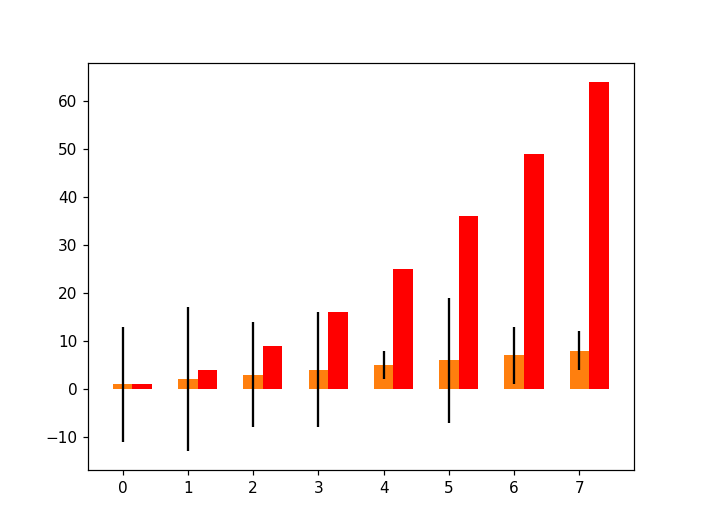

<Container object of 8 artists>

In [52]:
linear_data = np.arange(1,9)
print(linear_data)
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3)
#plt.bar(linear_data, linear_data, width = 0.3)

To add a second bar, we simply call the bar plot again with _new_ data, keeping in mind that we need to adjust the x component to make up for the first bar we plotted. 

Of course, we'll throw this bar in as <font color=red> red</font>. 

In [53]:
new_xvals = []

# plot another set of bars, adjusting the new xvals to make up for the first set of bars plotted
for item in xvals:
    new_xvals.append(item+0.3)

plt.bar(new_xvals, exponential_data, width = 0.3 ,color='red')

<Container object of 8 artists>

So the plot looks okay, but not great. All of the x labels are to the far left of the items being described, and not centered. Now, we can center them with a given bar, using the __align__ parameter, but it's a bit frustrating when you have to make multiple bars, and you have to calculate it yourself. And it's a pain to go through and add a new data series manually. And this gets worse, we actually have to manually iterate through and add in dates if we want them. Because otherwise we couldn't set the bar left location appropriately. 

I'll be honest, bar charts are one of my least favorite things to create in matplotlib. I feel like the foundation is there, but some of the ways I would want to use the API, such as plotting several series of data in groups across time, are sadly missing. 

There are some other nice features of bar charts, though. For instance, you can add error bars to each bar as well, using the y-error parameter. 

For example, each of our pieces of data in the linear data might actually be a mean value, computed from many different observations.
- So we could just create a list of error values. 
    - I'll import from a random function which can generate some random integers, and then I'll use a list comprehension to generate this new list. 
- Then we could just call plt.bar again, and see our new data appear. 

In [54]:
from random import randint
linear_err = [randint(0,15) for x in range(len(linear_data))] 

# This will plot a new set of bars with errorbars using the list of random error values
plt.bar(xvals, linear_data, width = 0.3, yerr=linear_err)

<Container object of 8 artists>

In [55]:
linear_err

[12, 15, 11, 12, 3, 13, 6, 4]

We can also do _stacked_ bar charts as well. For instance, if we wanted to show cumulative values while also keeping the series independent, we could do this by setting the __bottom__ parameter and our second plot to be equal to first set of data to plot. 

<IPython.core.display.Javascript object>


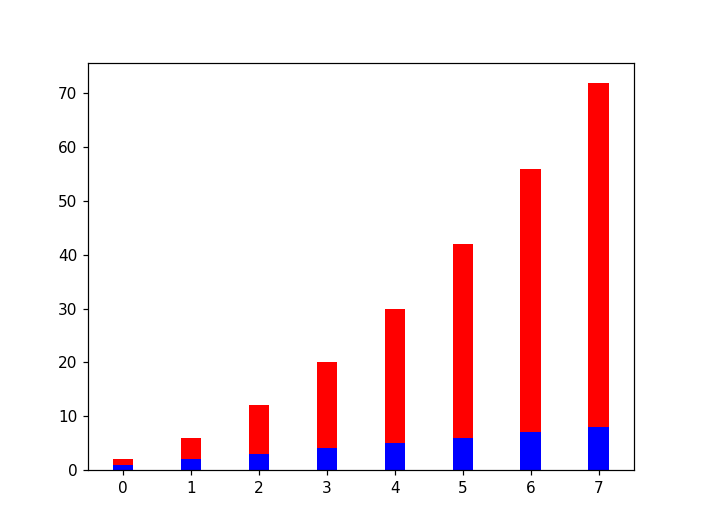

<Container object of 8 artists>

In [56]:
# stacked bar charts are also possible
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3, color='b')
plt.bar(xvals, exponential_data, width = 0.3, bottom=linear_data, color='r')

Finally, we can pivot this bar graph into a _horizontal_ bar graph by calling the barh function instead. But note that we have to change the bottom to a left and the width to a height. 

<IPython.core.display.Javascript object>


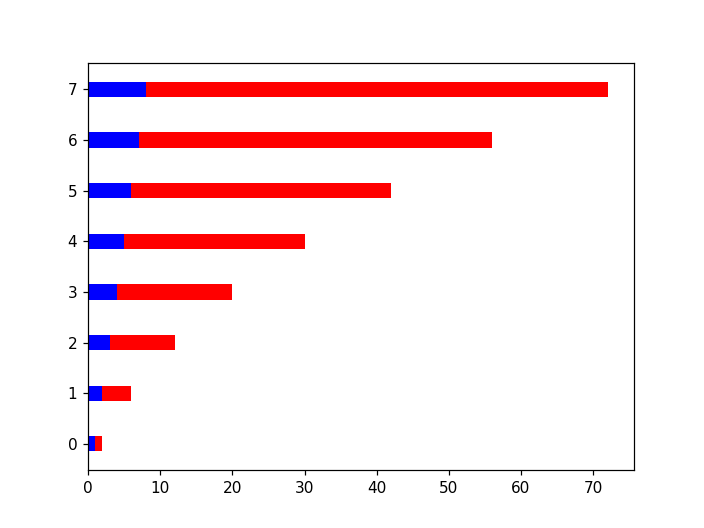

<Container object of 8 artists>

In [57]:
# or use barh for horizontal bar charts
plt.figure()
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height = 0.3, color='b')
plt.barh(xvals, exponential_data, height = 0.3, left=linear_data, color='r')

So those are the basics of charting and plotting in Matplotlib.

I think it's important to realize that there really _isn't_ any magic. 

The scripting layer is really a set of convenience functions on top of the object layer. Some people share a preference for one or the other, but at the core, they manipulate the same data elements. And I don't think you should think of them as being opposed to one another or duplicative. They work together, and being able to move back and forth is really important. 

We've talked about some fundamental charts in this module.
- Scatter plots, 
- line graphs, and 
- bar charts. 

There are more, which we'll dig into in the next module. But these are a good basis. 

The assignment for this module is a tough one. It's meant to show you real world data visualization problems. You're going to have to lever your knowledge of the Pandas Library from the first course and couple this with your new knowledge of Matplotlib to come to an elegant solution. But the final result should be a portfolio ready piece. So I'll see you in the forums for discussions and for help.

# Dejunkifying a plot

In this lecture, I want to walk you through the process of taking a regular Matplotlib plot and applying Tufte's principles of data-ink ratio and char junk to make it just a little bit better. 

I'm going to walk through all of the steps using the Jupiter notebooks and you're welcome to follow along. But if you want a bit more of a challenge, I'll be including in video quizzes along the way which prompts you to solve the problem before I address. 

This is good practice. The video will pause and you can do a quick Google to try and find an appropriate API for solving a specific issue. You can try it out in the system, then you can compare it to my solution right after.

Let's get started. 

We use a plot of data on the popularity of programming languages taken from stack overflow. Here there are five different languages, 
1. Python, 
2. SQL,
3. Java,
4. C++, and 
5. JavaScript.

We'll find their positions as a rank using NumPy as a range function. And here are the popularity values from stack overflow.

Here's the data we'll be working with:

| Language   | % Popularity |
|------------|--------------|
| Python     | 56           |
| SQL        | 39           |
| Java       | 34           |
| C++        | 34           |
| JavaScript | 29           |

We'll 
- create a bar chart based on rank and popularity, 
- then add x and y ticks and set a title.
- Then when we call plot.show, the figure will render. 

Okay, here's the first challenge. The tics along both axis are annoying and sort of clutter the document up a bit. And the labels on the y axis really should be direct. So let's remove all of these.

Text(0.5,1,'Top 5 Languages for Math & Data \nby % popularity on Stack Overflow')

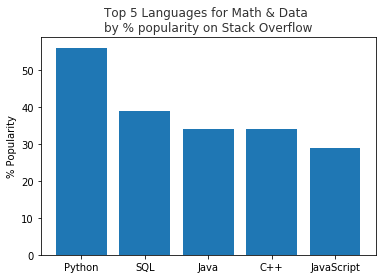

In [8]:
"""
Here's some sample code which has the ticks, can you figure out how to remove them?

Press run to see the generated image, and press continue to see my solution.

Task: Remove all the ticks (both axes), and tick labels on the Y axis.
"""
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

#TODO: remove all the ticks (both axes), and tick labels on the Y axis

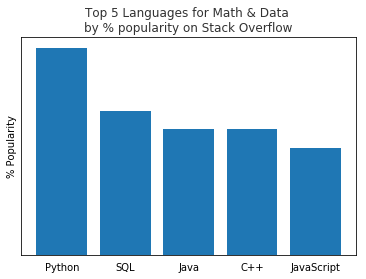

In [9]:
#Solution

import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

#My solution: remove all the ticks (both axes), and tick labels on the Y axis
ax = plt.gca()
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks([])
#ax.yaxis.set_ticklabels([])
plt.show()

#UM solution: remove all the ticks (both axes), and tick labels on the Y axis
#plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
#plt.show()

I use the tic param's method of plot to turn them all off except for the bottom label. It's nice to have a single function which can handle all of this. 

Now our plot still has this frame around it, but it's not really necessary and it seems a little heavyweight. Let's remove that ink. 

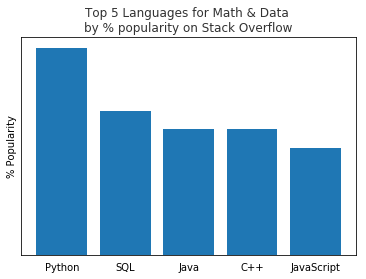

In [10]:
#Task: Remove the frame of the chart.

import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

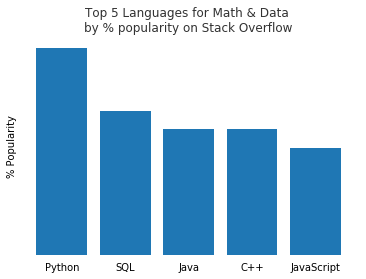

In [12]:
#Task: Remove the frame of the chart.

import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# My solution and UM solution: remove the frame of the chart
for item in plt.gca().spines.values():
    item.set_visible(False)
plt.show()

This is a bit more involved, but we can get the current axis, then iterate through all the spine, setting their visibility to false. Already, this chart looks much more lightweight. 

Now, the blue is okay, but it doesn't really help us differentiate between the bars at all. 

How about we 
- soften all of the hard blacks to gray,
- then we change the bar colors to gray as well. 
- Also, let's keep the Python bar the same color of blue that it was originally to make it stand out. 

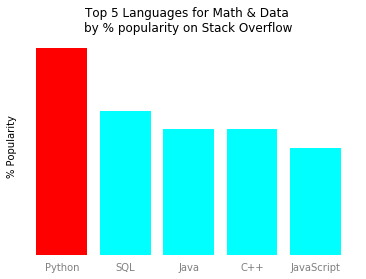

In [18]:
#Task: Change the bar colors to be less bright blue, make one bar, the python bar, a contrasting color, soften all labels by turning grey.

#My solution

import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# TODO: change the bar colors to be less bright blue
# TODO: make one bar, the python bar, a contrasting color
plt.bar(pos, popularity, align='center', color=['red', 'cyan', 'cyan', 'cyan', 'cyan'])

# TODO: soften all labels by turning grey
plt.xticks(pos, languages, color='grey')
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow')

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

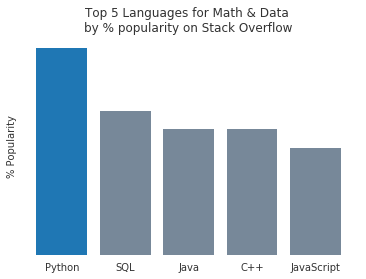

In [15]:
#UM solution

import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# change the bar colors to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
plt.ylabel('% Popularity', alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

Okay, so there are several different ways that we could do this. 

The way I chose was to add an __alpha__ parameter to everything, which adds a bit of transparency and softens the colors up a bit. I also set the bars themselves to a neutral gray color then chose a nice blue from the Python website to accentuate the first bar.

Of course, we've actually made the chart a little bit less accurate right now since we don't have any y labels. 

Let's fix this and remove the y axis label and just directly label the individual bars. We don't really need the y axis label, since the title tells us everything we need to know about the units in this chart. 

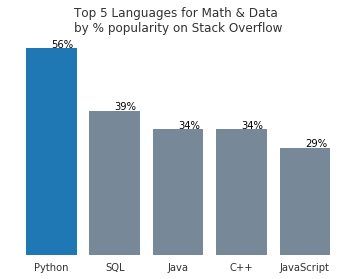

In [19]:
# Task: Directly label each bar with Y axis values, and remove the Y label since bars are directly labeled.

# My solution:

import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# change the bar colors to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)

# TODO: remove the Y label since bars are directly labeled
#plt.ylabel('% Popularity', alpha=0.8)

plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# TODO: direct label each bar with Y axis values
for i, v in enumerate(popularity):
  plt.gca().text(i, v+0.25, str(popularity[i])+'%')
plt.show()

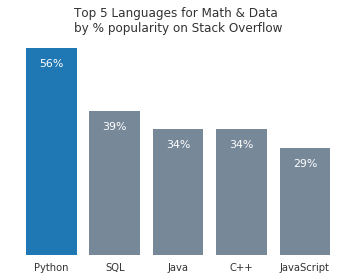

In [17]:
#UM solution

import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# change the bar color to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
# remove the Y label since bars are directly labeled
#plt.ylabel('% Popularity', alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='w', fontsize=11)
plt.show()

Removing the label is easy, but changing the bars is a little bit of a pain. 

For this we want to 
- iterate over each of the bars and grab its height. 
- Then we want to create a new text object with the data information.

Unfortunately, this means doing a little bit of playing with _padding_. Here I'll set up the x location to the bar x plus the width divided by two and the y location to be the bar height minus five.

It might seem weird to get the middle of the bar in the x dimension, but that's because I'm setting the label to center itself, horizontally. 

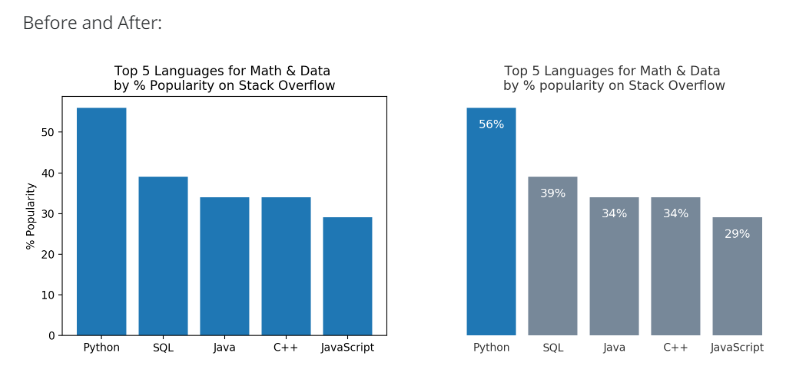

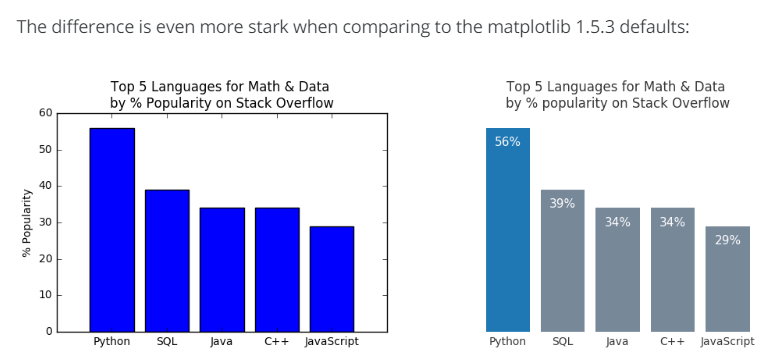

And that's all there is to it. A simple series of steps to make your bar charts little bit more usable. 

You could find a full notebook for this example and the Coursera Jupyter system directory (dejunking.ipynb). 

When you were looking at this, did you find a different way to do things? Or do you think there's other places that we could go to make this more readable and increase the improvements? Feel free to go into the discussion forums and share them with me and your classmates.